In [16]:
import pandas as pd
import numpy as np

# Загрузите файл data.csv в DataFrame
df = pd.read_csv('data.csv', sep=',')
# Добавьте столбец "Дата начала" с датами большими или равными датам в столбце "Дата"
start_dates = pd.to_datetime(df['Дата'], format='%d.%m.%Y') + pd.to_timedelta(np.random.randint(0, 5, size=len(df)), unit='D')

df['Дата начала'] = start_dates

# Создайте массив приоритетов и добавьте столбец "Приоритет" с случайными значениями из массива
priorities = ['Нормальный', 'Низкий', 'Высокий']
df['Приоритет'] = np.random.choice(priorities, size=len(df))

# Создайте столбец "Связанные задачи" с номерами связанных задач
related_tasks = ["связана с #{}".format(i) for i in np.random.randint(1, len(df) + 1, size=len(df))]
df['Связанные задачи'] = related_tasks

# Создайте столбец "Готовность" с процентами (20, 50, 70, 100)
readiness = np.random.choice([20, 50, 70, 100], size=len(df))
df['Готовность'] = readiness

# Добавьте случайные пропуски в данные (пустые значения)
df.loc[np.random.choice(df.index, size=int(0.1 * len(df)), replace=False), 'Приоритет'] = np.nan
df.loc[np.random.choice(df.index, size=int(0.1 * len(df)), replace=False), 'Связанные задачи'] = np.nan
df.loc[np.random.choice(df.index, size=int(0.1 * len(df)), replace=False), 'Готовность'] = np.nan

# Сохраните обновленный DataFrame обратно в файл data.csv
df.to_csv('data.csv', index=False)

In [35]:
from datetime import datetime, timedelta
import pandas as pd

# Загрузите файл data.csv в DataFrame
df = pd.read_csv('data.csv', sep=',')

plan_finish_dates = []
for index, row in df.iterrows():
    # Преобразуйте даты начала и завершения задач в формат "%d.%m.%Y"
    start_date = datetime.strptime(row['Дата начала'], "%d.%m.%Y")
    end_date = datetime.strptime(row['Дата'], "%d.%m.%Y")
    
    if end_date < start_date:
        end_date, start_date = start_date, end_date  # Поменяем местами даты, если дата завершения раньше даты начала
    
    # Посчитайте разницу между датами в днях
    days_difference = (end_date - start_date).days
    
    if days_difference == 0:
        days_difference = 1  # Если разница в днях равна 0, установим минимальное значение в 1 день
    
    # Сгенерируйте случайное количество дней в диапазоне от 1 до days_difference
    random_days = timedelta(days=random.randint(1, days_difference))
    
    # Вычислите плановую дату завершения, добавив случайное количество дней к дате начала
    plan_finish_date = start_date + random_days
    
    plan_finish_dates.append(plan_finish_date.strftime("%d.%m.%Y"))

# Добавьте столбец "Плановый срок завершения" в DataFrame
df['Плановый срок завершения'] = plan_finish_dates
# Сохраните обновленные данные обратно в CSV-файл
df.to_csv('data.csv', index=False)


Шаг 1: Среднее время на выполнение для каждого приоритета
   Приоритет  Время на выполнение
0        1.0            -1.991912
1        2.0            -2.002386
2        3.0            -1.996730


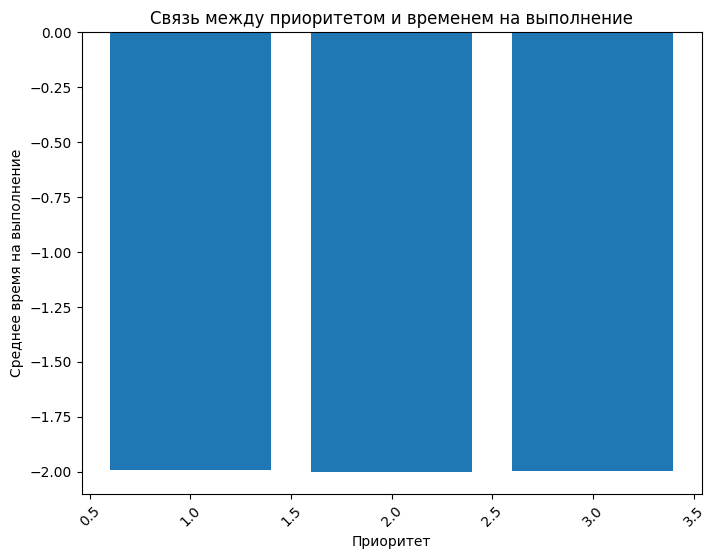

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузите файл data4.csv в DataFrame
df = pd.read_csv('data4.csv', sep=';')

# Преобразуйте столбец "Приоритет" в числовой формат (например, 1 для "Высокий", 2 для "Низкий" и 3 для "Нормальный")
priority_mapping = {"Высокий": 1, "Низкий": 2, "Нормальный": 3}
df['Приоритет'] = df['Приоритет'].map(priority_mapping)

# Преобразуйте столбцы "Дата начала" и "Плановый срок завершения" в формат даты
df['Дата начала'] = pd.to_datetime(df['Дата начала'], format='%Y-%m-%d')
df['Плановый срок завершения'] = pd.to_datetime(df['Плановый срок завершения'], format='%Y-%m-%d')

# Вычислите время на выполнение задачи как разницу между "Плановым сроком завершения" и "Датой начала"
df['Время на выполнение'] = (df['Плановый срок завершения'] - df['Дата начала']).dt.days

# Шаг 1: Группировка данных по приоритету и вычисление среднего времени на выполнение
priority_avg_time = df.groupby('Приоритет')['Время на выполнение'].mean().reset_index()

# Вывод результатов анализа
print("Шаг 1: Среднее время на выполнение для каждого приоритета")
print(priority_avg_time)

# Шаг 2: Построение графика
plt.figure(figsize=(8, 6))
plt.bar(priority_avg_time['Приоритет'], priority_avg_time['Время на выполнение'])
plt.xlabel("Приоритет")
plt.ylabel("Среднее время на выполнение")
plt.title("Связь между приоритетом и временем на выполнение")
plt.xticks(rotation=45)
plt.show()


In [22]:
import pandas as pd
import re

# Загрузите данные из файла
df = pd.read_csv('data2.csv', sep=',')

# Функция для удаления знаков препинания из текста
def remove_punctuation(text):
    # Замените знаки препинания на пустую строку
    text = re.sub(r'[;,.\-]', '', text)
    return text

# Примените функцию к столбцу "Задача"
df['Задача'] = df['Задача'].apply(remove_punctuation)

# Сохраните обновленные данные в тот же файл
df.to_csv('data2.csv', sep=',', index=False)


In [25]:
import pandas as pd
import numpy as np

# Загрузите данные из файла
df = pd.read_csv('data2.csv', sep=',')

# Преобразуйте столбец "Приоритет" в числовой формат (например, 1 для "Высокий", 2 для "Низкий" и 3 для "Нормальный")
priority_mapping = {"Высокий": 1, "Низкий": 2, "Нормальный": 3}
df['Приоритет'] = df['Приоритет'].map(priority_mapping)

# Рассчитайте корреляцию между "Приоритет" и "Количество дней на выполнение"
correlation = df['Приоритет'].corr(df['Количество дней'])

# Выведите коэффициент корреляции
print(f"Корреляция между Приоритетом и Количеством дней на выполнение: {correlation:.2f}")


Корреляция между Приоритетом и Количеством дней на выполнение: -0.01


In [8]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Загрузите ваш DataFrame с данными
df = pd.read_csv('data2.csv', sep=';')

# Переименование столбцов
df = df.rename(columns={'Количество дней': 'Days', 'Статус': 'Status'})

# Проведем однофакторный дисперсионный анализ
formula = 'Days ~ C(Status)'
model = ols(formula, data=df).fit()
anova_table = anova_lm(model, typ=2)

# Выведем результат ANOVA
print(anova_table)

                  sum_sq       df         F    PR(>F)
C(Status)     748.796922      9.0  1.112548  0.349547
Residual   845047.885748  11300.0       NaN       NaN


In [11]:
# Добавление столбца Дата завершения. Расчетный
import pandas as pd
from datetime import timedelta
import random

# Загрузите файл data4.csv в DataFrame
df = pd.read_csv('data2.csv', sep=';')

# Преобразуйте столбцы "Плановая дата завершения", "Дата" и "Дата начала" в формат даты
df['Плановая дата завершения'] = pd.to_datetime(df['Плановый срок завершения'], format='%d.%m.%Y')
df['Дата'] = pd.to_datetime(df['Дата'], format='%d.%m.%Y')
df['Дата начала'] = pd.to_datetime(df['Дата начала'], format='%d.%m.%Y')

# Функция для генерации случайных дат
def generate_random_end_date(row):
    max_date = max(row['Дата начала'] + timedelta(days=1), row['Плановый срок завершения'])
    return max_date + timedelta(days=random.randint(1, row['Количество дней']))

# Примените функцию для создания столбца "Дата завершения"
df['Дата завершения'] = df.apply(generate_random_end_date, axis=1)

# Сохраните обновленные данные в новый файл
df.to_csv('data2.csv', sep=';', index=False)


ValueError: time data "2023-11-04" doesn't match format "%d.%m.%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [9]:
import pandas as pd

# Загрузите файл data.csv в DataFrame с разделителем ";"
df = pd.read_csv('data.csv', sep=';')

# Извлеките заголовки столбцов
column_headers = df.columns.tolist()

# Отобразите первые строки для оценки данных
df.head()

# Преобразование столбца "час(а,ов)" в числовой формат
df['час(а,ов)'] = df['час(а,ов)'].str.replace(',', '.').astype(float)

# Группировка данных по статусу и сумма времени выполнения
status_time = df.groupby('Статус')['час(а,ов)'].sum().reset_index()

# Округление времени выполнения в днях и часах
status_time['Дней'] = status_time['час(а,ов)'] // 24
status_time['Часов'] = status_time['час(а,ов)'] % 24

# Отобразите результат анализа
result_table = status_time[['Статус', 'Дней', 'Часов']]
result_table

,Статус,Дней,Часов
0,В очереди,18.0,12.00
1,В работе,112.0,11.00
2,Закрыта,417.0,12.50
3,Запрос информации,2.0,14.00
4,На тестировании,439.0,4.50
5,На тестировании у клиента,8.0,13.00
6,Новая,5.0,14.00
7,Отклонена,6.0,5.50
8,Приостановлено,83.0,6.00
9,Решена,1195.0,9.04


In [11]:
import pandas as pd
import numpy as np

# Загрузите файл data.csv в DataFrame
df = pd.read_csv('data.csv', sep=';')

# Генерируйте случайные числа от 1 до 30
random_days = np.random.randint(1, 31, size=len(df))

# Присвойте сгенерированные числа столбцу "Количество дней"
df['Количество дней'] = random_days

# Сохраните обновленный DataFrame обратно в файл data.csv
df.to_csv('data.csv', index=False)

In [18]:
import pandas as pd

# Загрузите файл data4_updated.csv в DataFrame
df = pd.read_csv('data2.csv', sep=';')

# Преобразуйте столбцы "Плановая дата завершения", "Дата начала" и "Дата завершения" в формат даты
df['Плановый срок завершения'] = pd.to_datetime(df['Плановый срок завершения'], format='%Y-%m-%d')
df['Дата начала'] = pd.to_datetime(df['Дата начала'], format='%Y-%m-%d')
df['Дата завершения'] = pd.to_datetime(df['Дата завершения'], format='%Y-%m-%d')

# Создайте новый столбец "Завершено в срок", который указывает, была ли задача завершена в срок
df['Завершено в срок'] = df['Дата завершения'] <= df['Плановый срок завершения']

# Группируйте данные по пользователю и подсчитайте количество задач, завершенных в срок
user_completion_counts = df.groupby('Пользователь')['Завершено в срок'].sum().reset_index()

# Отсортируйте пользователей по убыванию количества задач, завершенных в срок
user_completion_counts = user_completion_counts.sort_values(by='Завершено в срок', ascending=False)

# Выведите результат
print("Пользователи, чаще завершающие задачи в срок:")
print(user_completion_counts)


Пользователи, чаще завершающие задачи в срок:
        Пользователь  Завершено в срок
7   Буторина Татьяна               236
46  Руднев Александр               235
45   Розсохань Елена               205
25   Курбатова Софья               168
23  Костенко Алексей               163
..               ...               ...
28    Марченко Алена                 0
19      Илясов Макар                 0
33     Найденов Юрий                 0
53       Танцов Илья                 0
41  Портянкин Виктор                 0

[68 rows x 2 columns]


In [17]:
import pandas as pd
import random

# Загрузите файл data4_updated.csv в DataFrame
df = pd.read_csv('data2.csv', sep=';')

# Преобразуйте столбцы "Плановая дата завершения" и "Дата завершения" в формат даты
df['Плановый срок завершения'] = pd.to_datetime(df['Плановый срок завершения'], format='%Y-%m-%d')
df['Дата завершения'] = pd.to_datetime(df['Дата завершения'], format='%Y-%m-%d')

# Создайте новый столбец "Дата завершения (отклонение от плана)" с разницей в днях
df['Дата завершения (отклонение от плана)'] = (df['Дата завершения'] - df['Плановый срок завершения']).dt.days

# Определите количество строк в DataFrame
total_rows = len(df)

# Выберите случайные индексы для изменения данных
random_indices = random.sample(range(total_rows), int(0.4 * total_rows))

# Измените даты в выбранных строках, чтобы они превышали плановые даты завершения
for index in random_indices:
    # Здесь вы можете создать случайную дату, которая превышает плановую дату завершения
    # Например, вы можете добавить случайное количество дней к плановой дате завершения
    random_days = random.randint(1, 10)  # Пример: случайно добавить от 1 до 10 дней
    new_date = df.at[index, 'Плановый срок завершения'] + pd.Timedelta(days=random_days)
    df.at[index, 'Дата завершения'] = new_date

# Выберите случайные индексы для строк, которые будут равны плановым датам завершения
random_indices = random.sample(range(total_rows), int(0.3 * total_rows))

# Измените даты в выбранных строках, чтобы они равнялись плановым датам завершения
for index in random_indices:
    df.at[index, 'Дата завершения'] = df.at[index, 'Плановый срок завершения']

# Сохраните обновленные данные в новый файл
df.to_csv('data2.csv', sep=';', index=False)


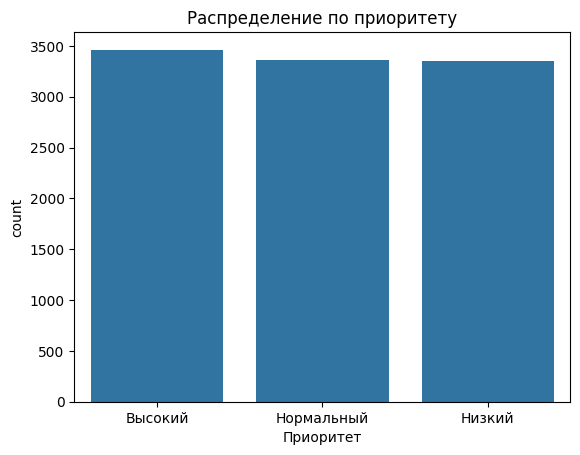

                            Завершено в срок
Пользователь    Приоритет                   
Артемова Ксения Высокий             0.313131
                Низкий              0.373626
                Нормальный          0.301075
Бердникова Анна Высокий             0.358025
                Низкий              0.282609
...                                      ...
Ярыгина Ирина   Низкий              0.357143
                Нормальный          0.342466
Яценко Кристина Высокий             0.500000
                Низкий              0.000000
                Нормальный          1.000000

[177 rows x 1 columns]


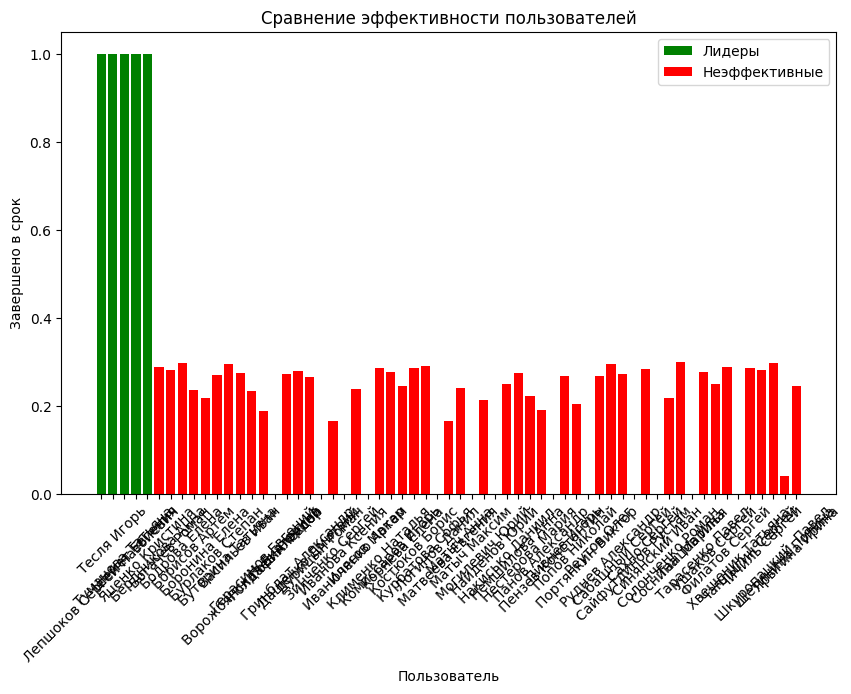

                  Завершено в срок  Приоритет
Завершено в срок          1.000000  -0.001711
Приоритет                -0.001711   1.000000


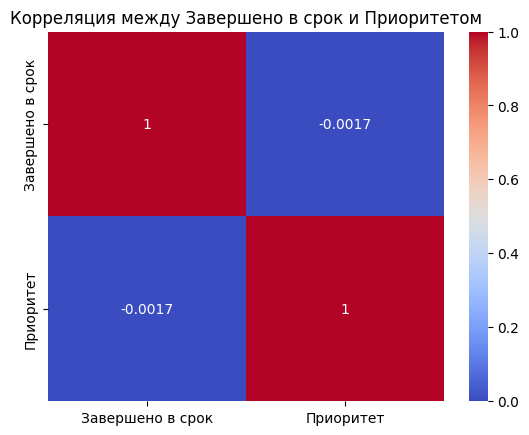

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузите файл с данными в DataFrame
df = pd.read_csv('data2.csv', sep=';')

# Проведите анализ данных
# 1. Постройте гистограмму или столбчатую диаграмму для приоритета
sns.countplot(x='Приоритет', data=df)
plt.title('Распределение по приоритету')
plt.show()

# Создайте новый столбец "Завершено в срок", который указывает, была ли задача завершена в срок
df['Завершено в срок'] = df['Дата завершения'] <= df['Плановый срок завершения']

# Группируйте данные по пользователю и подсчитайте количество задач, завершенных в срок
user_completion_counts = df.groupby('Пользователь')['Завершено в срок'].sum().reset_index()

# Отсортируйте пользователей по убыванию количества задач, завершенных в срок
user_completion_counts = user_completion_counts.sort_values(by='Завершено в срок', ascending=False)

# 2. Постройте сводную таблицу, показывающую связь между Пользователем, Завершено в срок и Приоритетом
pivot_table = pd.pivot_table(df, values='Завершено в срок', index=['Пользователь', 'Приоритет'], aggfunc='mean')
print(pivot_table)

# Фильтрация пользователей
selected_users = pivot_table[(pivot_table > 0.7) | (pivot_table < 0.3)].reset_index()

# Разделение на лидеров и неэффективных
leaders = selected_users[selected_users['Завершено в срок'] > 0.7]
inefficient = selected_users[selected_users['Завершено в срок'] < 0.3]

# Постройка столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(leaders['Пользователь'], leaders['Завершено в срок'], label='Лидеры', color='g')
plt.bar(inefficient['Пользователь'], inefficient['Завершено в срок'], label='Неэффективные', color='r')
plt.xlabel("Пользователь")
plt.ylabel("Завершено в срок")
plt.title("Сравнение эффективности пользователей")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Преобразуйте столбец "Приоритет" в числовой формат (например, 1 для "Высокий", 2 для "Низкий" и 3 для "Нормальный")
priority_mapping = {"Высокий": 1, "Низкий": 2, "Нормальный": 3}
df['Приоритет'] = df['Приоритет'].map(priority_mapping)

# 3. Постройте корреляционную матрицу, чтобы оценить корреляцию между переменными
correlation_matrix = df[['Завершено в срок', 'Приоритет']].corr()
print(correlation_matrix)

# 4. Постройте тепловую карту для корреляционной матрицы
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляция между Завершено в срок и Приоритетом')
plt.show()
